In [1]:
%matplotlib inline
from matplotlib import pyplot

In [3]:
import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [4]:
backend.backend()

'tensorflow'

In [5]:
(x_train, y_train,), (x_test, y_test) = mnist.load_data()

In [6]:
type(x_train)

numpy.ndarray

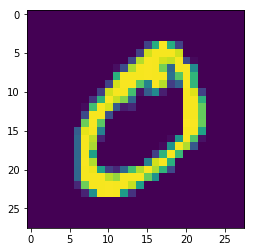

In [7]:
pyplot.imshow(x_train[1])

In [8]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [9]:
(samples, x, y) = x_train.shape

In [10]:
new_x = x_train.reshape(samples, x*y)

In [11]:
(test_samples, x, y) = x_test.shape

In [12]:
new_x_test = x_test.reshape(test_samples, x * y)

In [13]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [14]:
(samples,) = y_train.shape

In [15]:
new_y = np.zeros((samples,10), dtype=np.int)
new_y.shape

(60000, 10)

In [16]:
for i in range(0, samples):
    new_y[i, y_train[i]] = 1
    
new_y[0:10]    

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [17]:
(samples,) = y_test.shape

In [18]:
new_y_test = np.zeros((samples,10))

In [19]:
for i in range(0, samples):
    new_y_test[i, y_test[i]] = 1
    
new_y_test[0:10]    

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

### Build the model

In [29]:
layers = int((28/2) ** 2)
#layers = 28

In [30]:
model = Sequential()
model.add(Dense(input_dim=784, output_dim=layers))
model.add(Activation('sigmoid'))
model.add(Dense(output_dim=10))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=SGD() , metrics=['accuracy'])


### Let's train our network

In [31]:
history = model.fit(new_x, new_y, nb_epoch=10, batch_size=1000)

Epoch 1/10
60000/60000 [==============================] - 2s - loss: 2.1732 - acc: 0.2334     

In [32]:
history.history


{'acc': [0.23336666611333687,
  0.5535999993483226,
  0.7033333301544189,
  0.77743333478768661,
  0.81263333360354106,
  0.83580000003178911,
  0.85155000189940133,
  0.86306667327880859,
  0.87160000304381058,
  0.8781166662772496],
 'loss': [2.1732031822204592,
  1.8048304498195649,
  1.4472677826881408,
  1.1604902664820353,
  0.96706718802452085,
  0.83623481690883639,
  0.74295852581659949,
  0.67399071653683984,
  0.62083739042282104,
  0.57837990125020344]}

In [46]:
result = model.evaluate(new_x_test, new_y_test, batch_size=32)


 9408/10000 [===========================>..] - ETA: 0s

In [48]:
result

[0.44376691160202025, 0.8952]

In [49]:
model.predict_classes(new_x_test[0:5])

5/5 [==============================] - 0s


array([7, 2, 1, 0, 4])

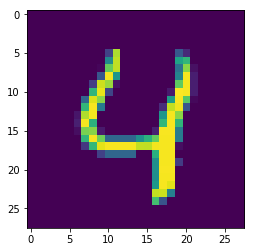

In [57]:
pyplot.imshow(x_test[4])